# Image Allignment


In [2]:
# Imports
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve


In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/zuwnn6rqe0f4zgh/opencv_bootcamp_assets_NB8.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB8.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

# Read Template and scanned form 


In [19]:
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)

im1 = cv.imread(refFilename, cv.IMREAD_COLOR)
im1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Read Template and scanned form 
imFilename = "scanned-form.jpg"
print("Reading image to be aligned : ", imFilename)
im2 = cv.imread(imFilename, cv.IMREAD_COLOR)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

Reading reference image :  form.jpg
Reading image to be aligned :  scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

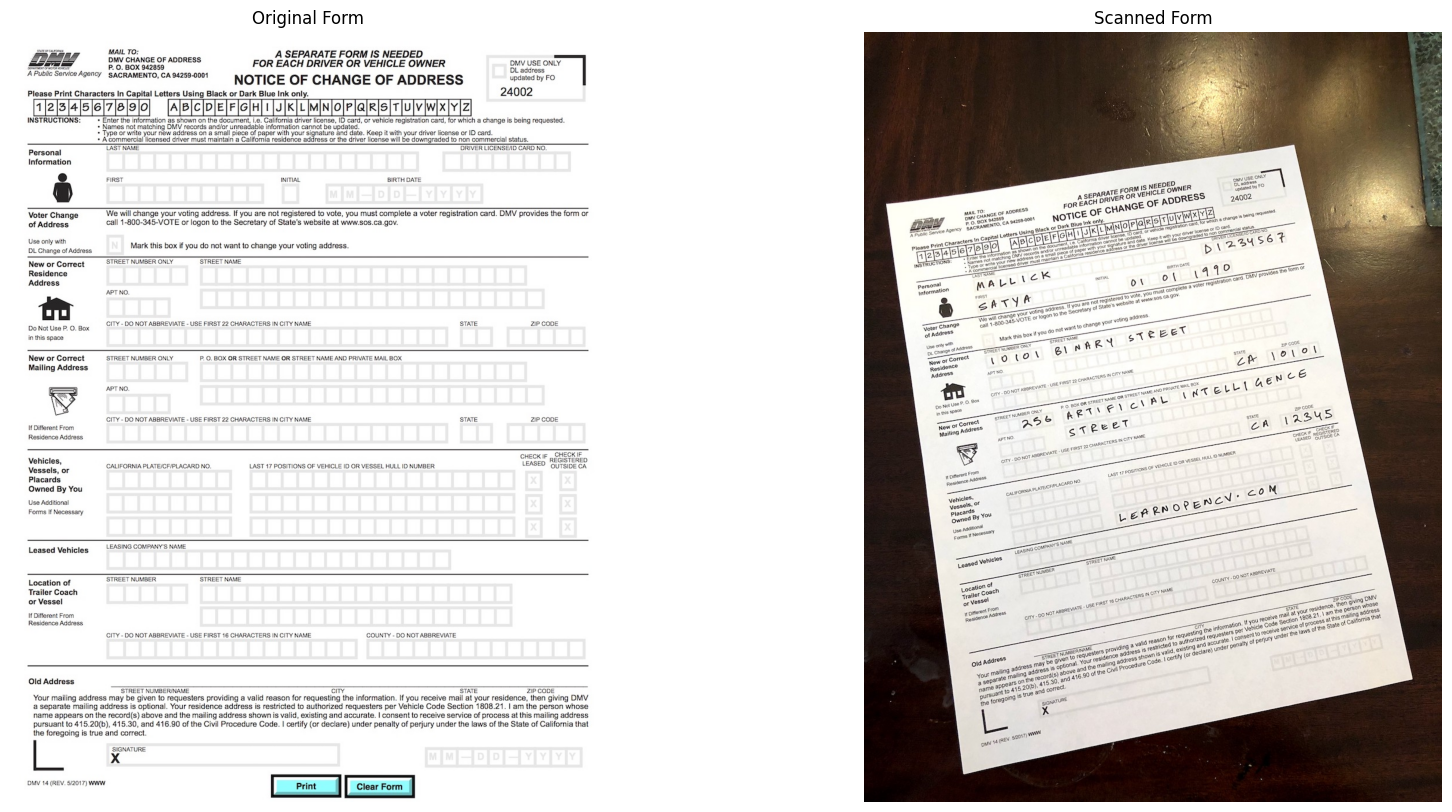

In [22]:
# Display the images 

plt.figure(figsize=[20, 10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

# Finding Key points in both images 


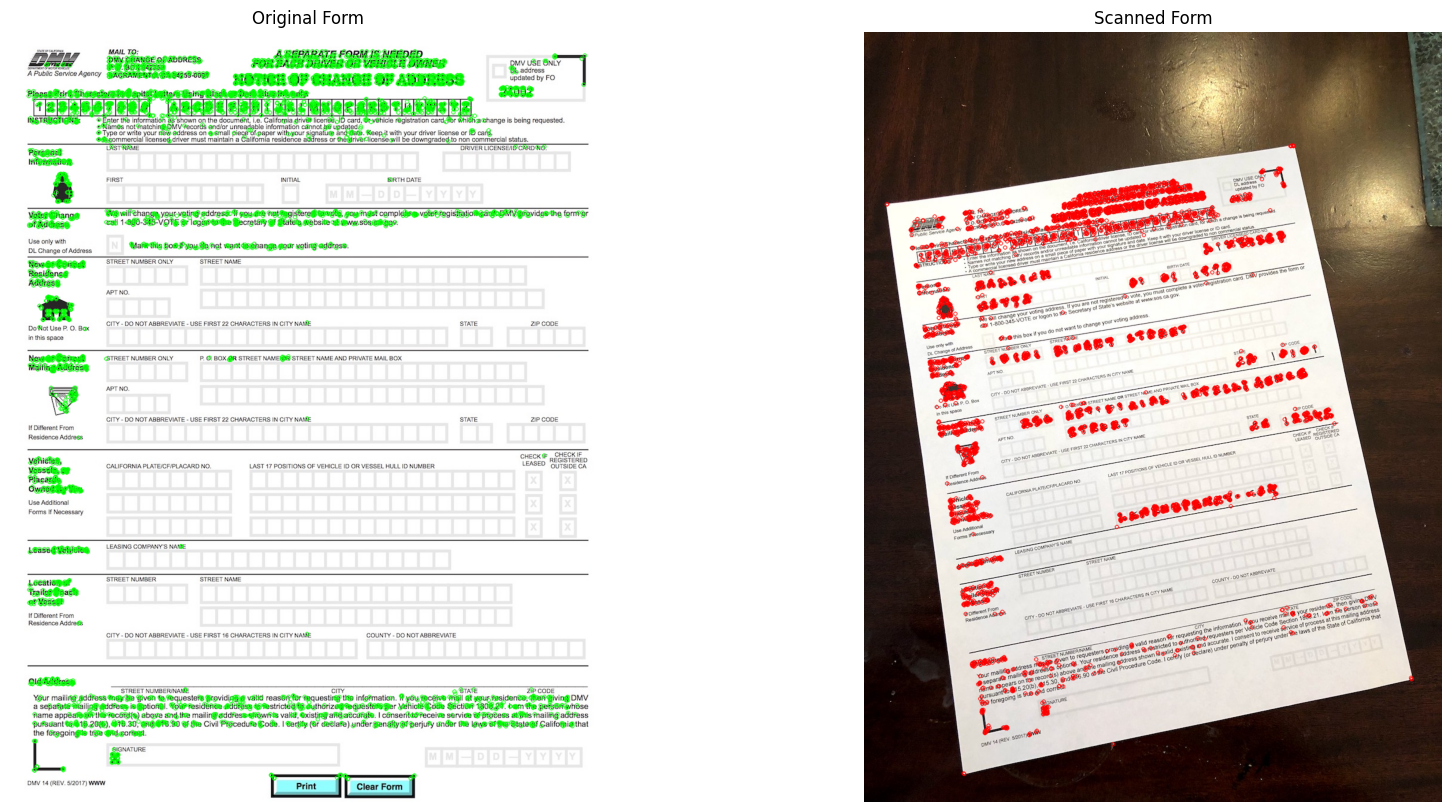

In [28]:
# converting images to grayscale 
im1_gray = cv.cvtColor(im1,cv.COLOR_RGB2GRAY)
im2_gray = cv.cvtColor(im2,cv.COLOR_RGB2GRAY)


# Detect ORB features and compute descriptors. 

orb = cv.ORB_create(5000)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray,None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray,None)

#Display 
im1_display = cv.drawKeypoints(im1, keypoints1, None, color=(0,255,0), flags=0)
im2_display = cv.drawKeypoints(im2, keypoints2, None, color=(255,0,0), flags=0)


plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

# Matching key points in these 2 files now 


In [ ]:
# match features
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)